# Temprature Forcasting:

In [1]:
# import the libraroies
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")

In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
# check rows and columns
df.shape

(7752, 25)

In [5]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [6]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [8]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [9]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

### handling Null Values:

In [10]:
df['station'].iloc[7750]=1.0
df['station'].iloc[7751] =2.0

In [11]:
df['Date'].iloc[7750] = '31-08-2017'
df['Date'].iloc[7751] = '31-08-2017'

In [12]:
for col in df.columns:
    if col not in ['station','Date']:
        df[col]=df[col].replace(np.nan,df[col].median())

In [13]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

### Visualization:

2.785000    310
0.514100    310
0.271300    310
0.222300    310
0.155400    310
0.133200    310
0.572100    310
4.729600    310
1.767800    310
1.231300    310
0.697000    310
2.257900    310
0.855200    310
0.618000    310
2.686500    310
0.593100    310
0.623300    310
5.178200    310
0.412500    310
1.562900    310
0.098500    310
0.145700    310
0.505500    310
2.534800    310
0.266100    310
0.098475      1
5.178230      1
Name: Slope, dtype: int64

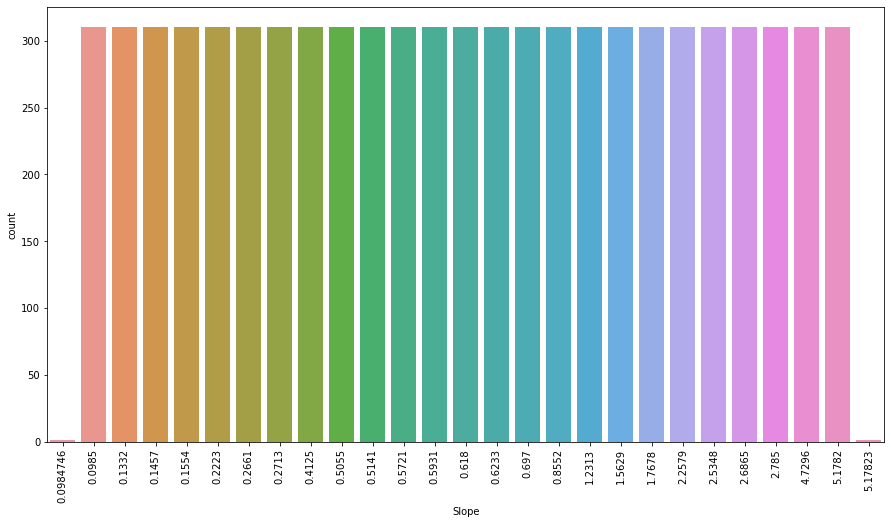

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(x='Slope',data=df)
plt.xticks(rotation=90)

df['Slope'].value_counts()

212.3350    311
12.3700     311
30.9680     310
17.2956     310
15.5876     310
21.9668     310
26.2980     310
146.5540    310
75.0924     310
56.4448     310
53.4712     310
82.2912     310
30.0464     310
59.8324     310
44.7624     310
132.1180    310
28.7000     310
208.5070    310
50.9312     310
52.5180     310
54.6384     310
35.0380     310
45.7160     310
33.3068     310
19.5844     310
Name: DEM, dtype: int64

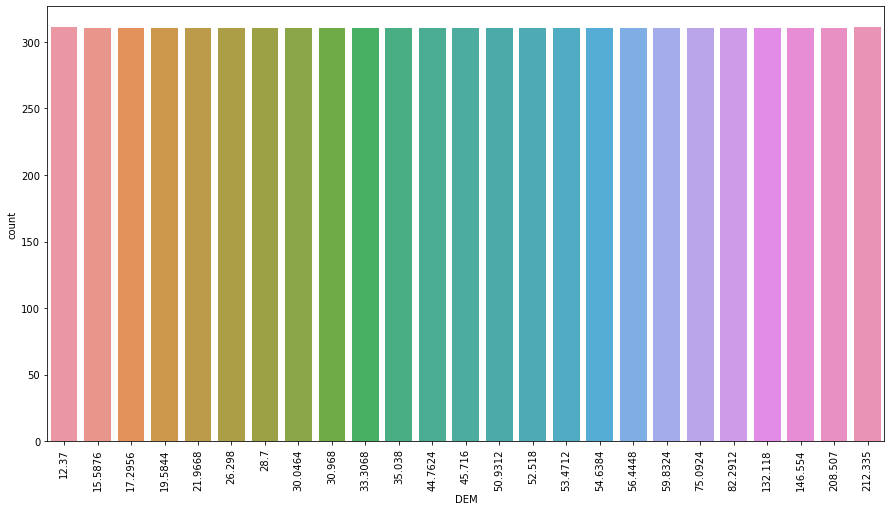

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(x='DEM',data=df)
plt.xticks(rotation=90)

df['DEM'].value_counts()

All the elevations have same count equal to 310 except two who have 311 counts each.

127.135    311
126.826    311
126.991    310
126.937    310
126.909    310
126.891    310
127.086    310
127.040    310
127.004    310
126.938    310
127.024    310
127.099    310
126.995    310
127.083    310
126.927    310
127.032    310
126.988    310
127.085    310
126.955    310
126.910    310
126.838    310
127.042    310
127.022    310
127.058    310
126.970    310
Name: lon, dtype: int64

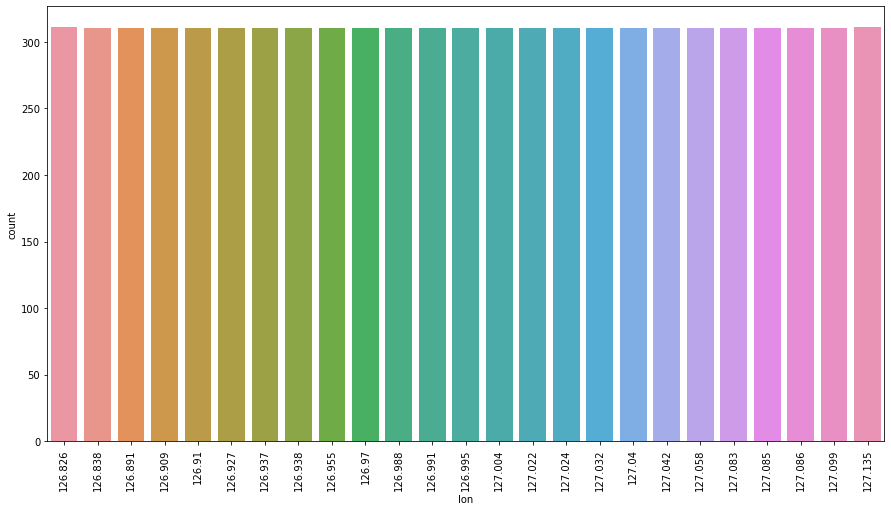

In [16]:
plt.figure(figsize=(15,8))
sns.countplot(x='lon',data=df)
plt.xticks(rotation=90)

df['lon'].value_counts()

All the longitute have some  count equal to 310 except two longitudes thhat have 311 counts each.

37.5776    1240
37.5507    1240
37.6046     620
37.5102     620
37.4697     620
37.4967     620
37.5372     620
37.6181     620
37.5237     620
37.6450     311
37.4562     311
37.4832     310
Name: lat, dtype: int64

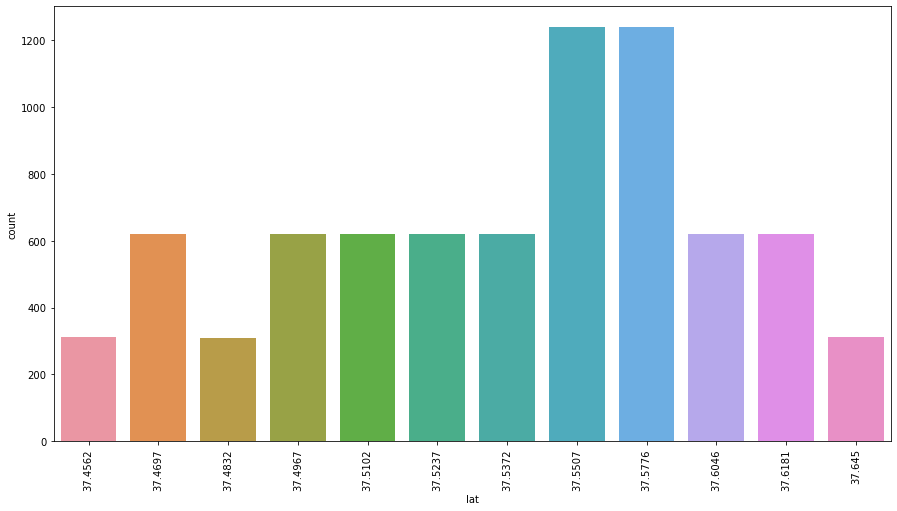

In [17]:
plt.figure(figsize=(15,8))
sns.countplot(x='lat',data=df)
plt.xticks(rotation=90)

df['lat'].value_counts()

1.0     311
2.0     311
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64

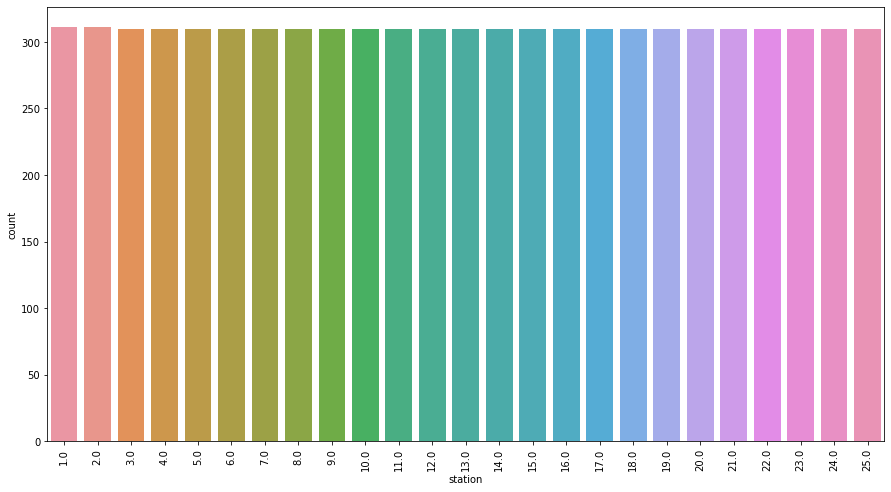

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(x='station',data=df)
plt.xticks(rotation=90)

df['station'].value_counts()

There are 25 stations each of them have 310 observations.

Text(0.5, 1.0, 'Distributin of Present_Tmax')

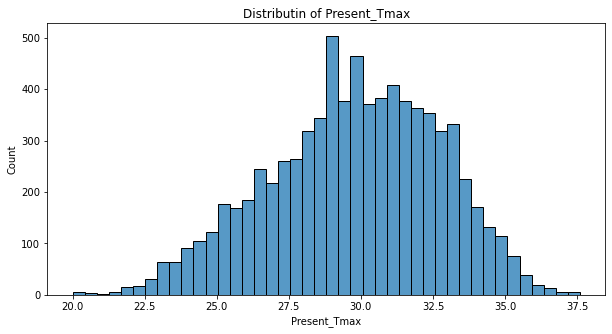

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(df['Present_Tmax'])
plt.title('Distributin of Present_Tmax')

Present_Tmax have highest temp. as 37.6 and min as 20.Most of the days have Tmax equal to 28.5.Its looks like normal distributed.


Text(0.5, 1.0, 'Distributin of Present_Tmin')

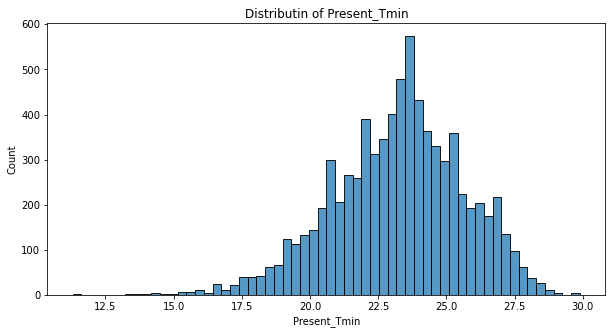

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(df['Present_Tmin'])
plt.title('Distributin of Present_Tmin')

It is also look like normal distributed.it have highest temp as 29.9 an min as 11.3, most o days have tmon equal to 23.

Text(0.5, 1.0, 'Distributin of LDAPS_RHmax')

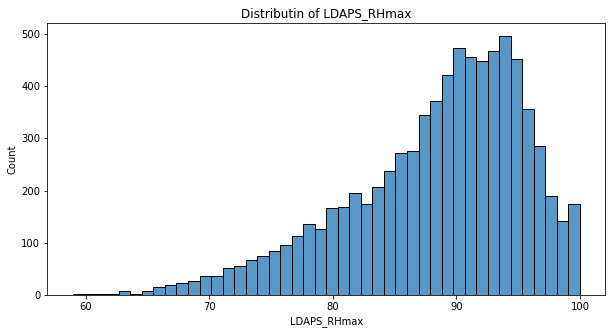

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(df['LDAPS_RHmax'])
plt.title('Distributin of LDAPS_RHmax')

Text(0.5, 1.0, 'Distributin of LDAPS_RHmin')

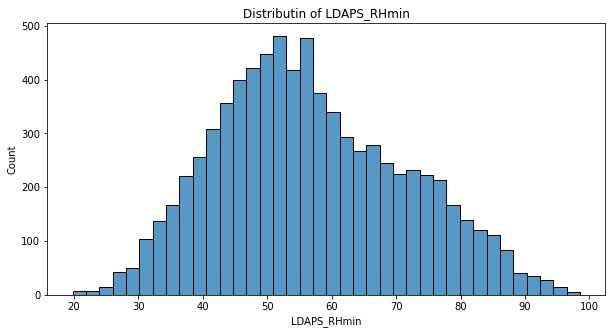

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(df['LDAPS_RHmin'])
plt.title('Distributin of LDAPS_RHmin')

Text(0.5, 1.0, 'Distributin of LDAPS_Tmax_lapse')

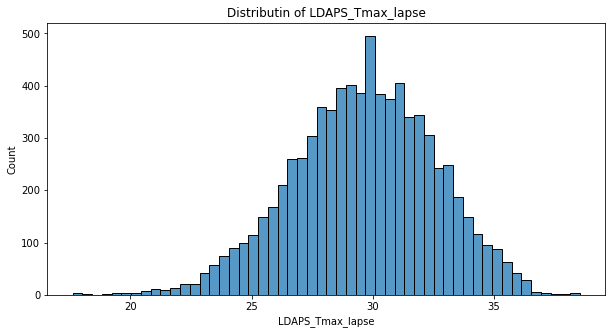

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(df['LDAPS_Tmax_lapse'])
plt.title('Distributin of LDAPS_Tmax_lapse')

Text(0.5, 1.0, 'Distributin of LDAPS_Tmin_lapse')

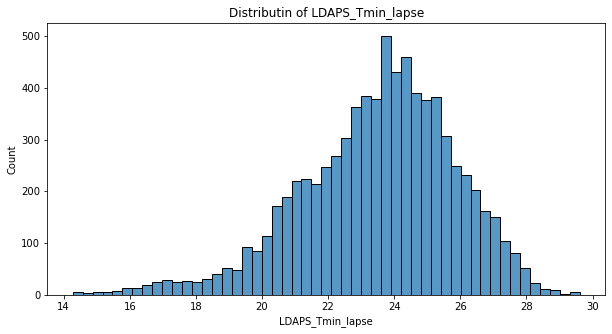

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(df['LDAPS_Tmin_lapse'])
plt.title('Distributin of LDAPS_Tmin_lapse')

Text(0.5, 1.0, 'Distributin of LDAPS_WS')

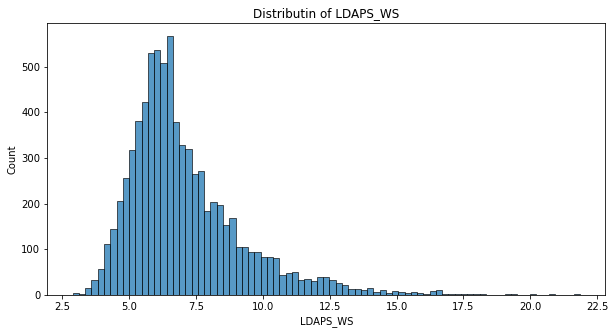

In [25]:
plt.figure(figsize=(10,5))
sns.histplot(df['LDAPS_WS'])
plt.title('Distributin of LDAPS_WS')

Dta of  average wind speed ris right skewed.it have its minimum value at 2.88m/s and maxi. values at 21.85m/s and majority of its values 
lies in the range 5m/s to 8m/s.

Text(0.5, 1.0, 'Distributin of LDAPS_LH')

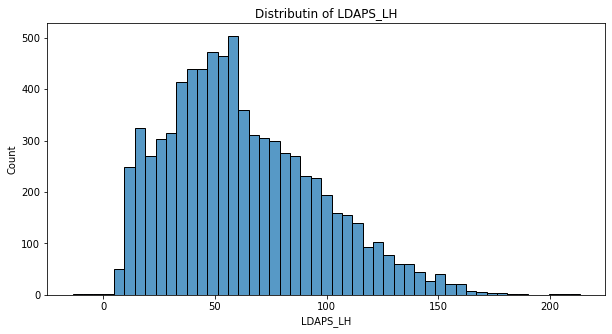

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(df['LDAPS_LH'])
plt.title('Distributin of LDAPS_LH')

Text(0.5, 1.0, 'Distributin of Solar radiation')

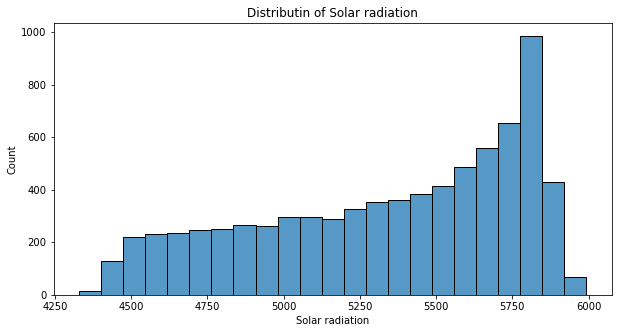

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(df['Solar radiation'])
plt.title('Distributin of Solar radiation')

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

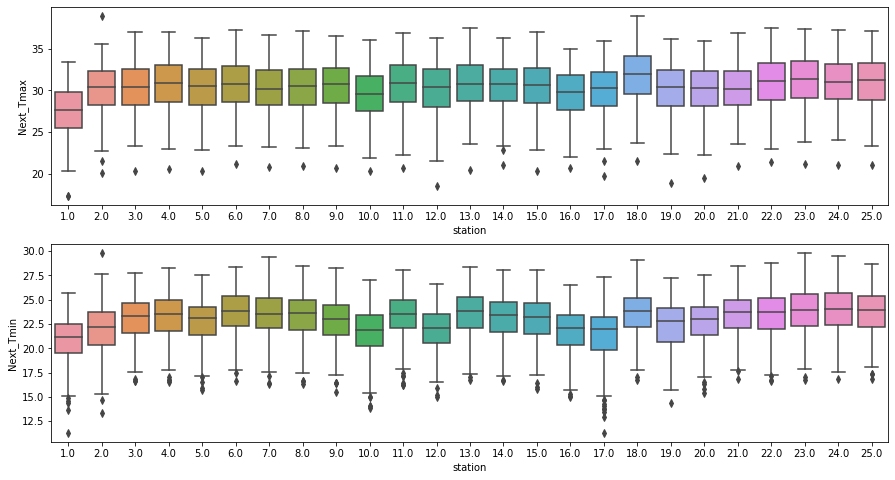

In [28]:
plt.figure(figsize = (15,8))
plt.subplot(2,1,1)
sns.boxplot(x='station',y='Next_Tmax',data =df)
plt.subplot(2,1,2)
sns.boxplot(x='station',y='Next_Tmin',data=df)

Station 18 observs highest temp for both Tmax and Tmin while station 1 observation 1 observes lowest temp.ffor both.
it could be because of their  location.

<AxesSubplot:xlabel='lat', ylabel='Next_Tmin'>

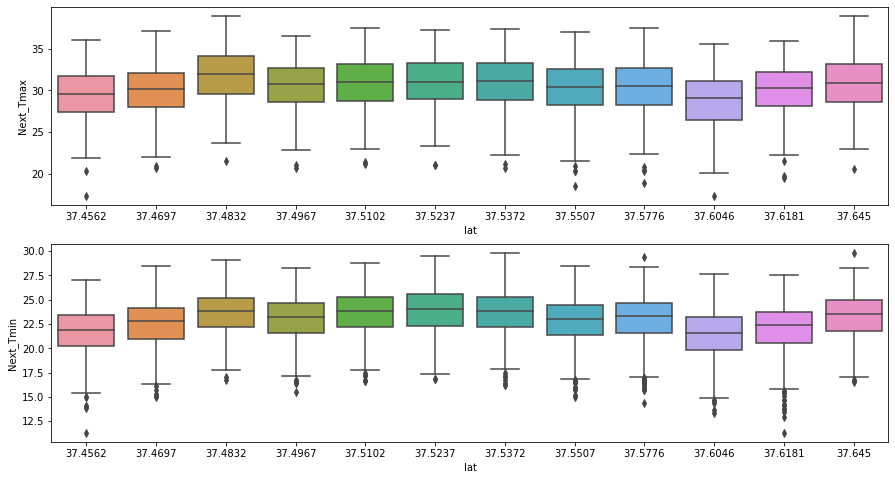

In [29]:
plt.figure(figsize = (15,8))
plt.subplot(2,1,1)
sns.boxplot(x='lat',y='Next_Tmax',data =df)
plt.subplot(2,1,2)
sns.boxplot(x='lat',y='Next_Tmin',data=df)

Tem. seems to fall as the lat increse which is also a know fact.Highest temp. is observed at 37.645 for Tmax while this is not 
the case for Tmin which could be because of the other factors that affect the temp.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '126.826'),
  Text(1, 0, '126.838'),
  Text(2, 0, '126.891'),
  Text(3, 0, '126.909'),
  Text(4, 0, '126.91'),
  Text(5, 0, '126.927'),
  Text(6, 0, '126.937'),
  Text(7, 0, '126.938'),
  Text(8, 0, '126.955'),
  Text(9, 0, '126.97'),
  Text(10, 0, '126.988'),
  Text(11, 0, '126.991'),
  Text(12, 0, '126.995'),
  Text(13, 0, '127.004'),
  Text(14, 0, '127.022'),
  Text(15, 0, '127.024'),
  Text(16, 0, '127.032'),
  Text(17, 0, '127.04'),
  Text(18, 0, '127.042'),
  Text(19, 0, '127.058'),
  Text(20, 0, '127.083'),
  Text(21, 0, '127.085'),
  Text(22, 0, '127.086'),
  Text(23, 0, '127.099'),
  Text(24, 0, '127.135')])

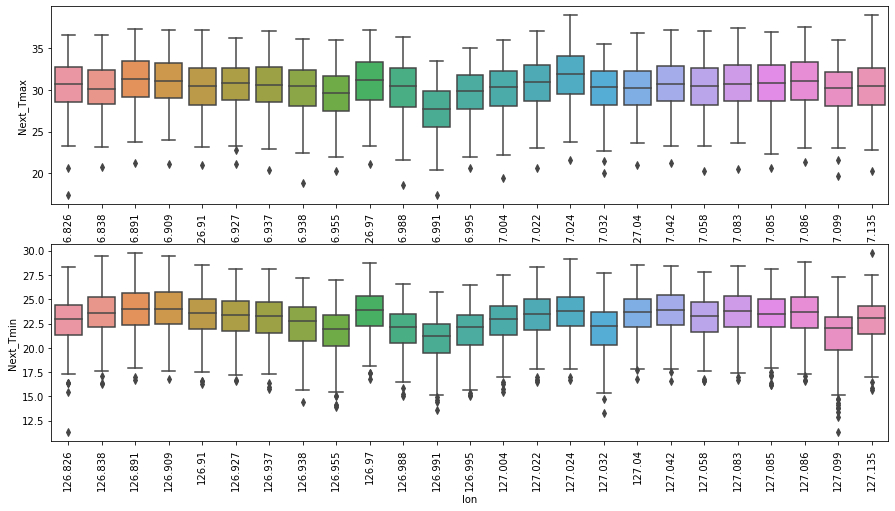

In [30]:
plt.figure(figsize = (15,8))
plt.subplot(2,1,1)
sns.boxplot(x='lon',y='Next_Tmax',data =df)
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.boxplot(x='lon',y='Next_Tmin',data=df)
plt.xticks(rotation=90)

Longitude does not affect the temp. of a place.While from the above graph it seen that as the 
log increses,temp increase for the first 4 longitudes then decreses then decreses for the next 5. this increse is carried on.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '12.37'),
  Text(1, 0, '15.5876'),
  Text(2, 0, '17.2956'),
  Text(3, 0, '19.5844'),
  Text(4, 0, '21.9668'),
  Text(5, 0, '26.298'),
  Text(6, 0, '28.7'),
  Text(7, 0, '30.0464'),
  Text(8, 0, '30.968'),
  Text(9, 0, '33.3068'),
  Text(10, 0, '35.038'),
  Text(11, 0, '44.7624'),
  Text(12, 0, '45.716'),
  Text(13, 0, '50.9312'),
  Text(14, 0, '52.518'),
  Text(15, 0, '53.4712'),
  Text(16, 0, '54.6384'),
  Text(17, 0, '56.4448'),
  Text(18, 0, '59.8324'),
  Text(19, 0, '75.0924'),
  Text(20, 0, '82.2912'),
  Text(21, 0, '132.118'),
  Text(22, 0, '146.554'),
  Text(23, 0, '208.507'),
  Text(24, 0, '212.335')])

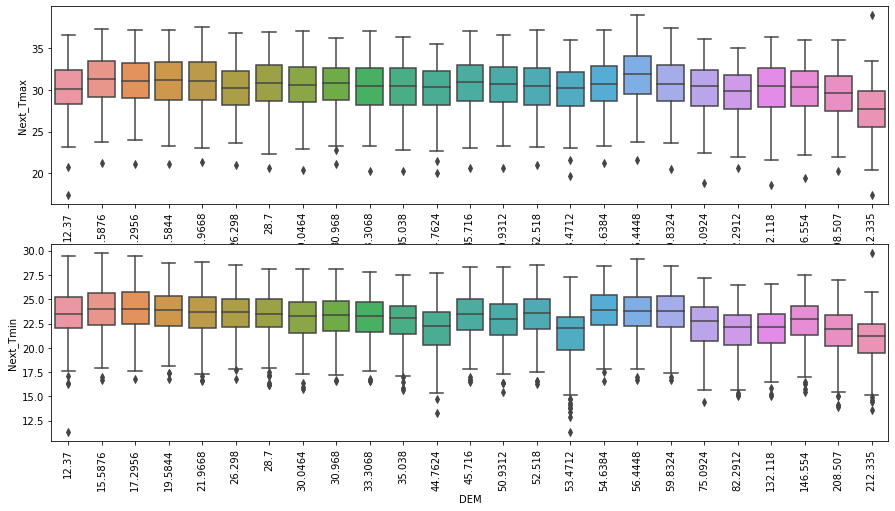

In [31]:
plt.figure(figsize = (15,8))
plt.subplot(2,1,1)
sns.boxplot(x='DEM',y='Next_Tmax',data =df)
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.boxplot(x='DEM',y='Next_Tmin',data=df)
plt.xticks(rotation=90)

It shows that as the elevation increases,temp decreses.This even true for our graph for the last 10
high elevations but not for all.It seems that temp.is also affected by other features rather than just elevation.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, '0.0984746'),
  Text(1, 0, '0.0985'),
  Text(2, 0, '0.1332'),
  Text(3, 0, '0.1457'),
  Text(4, 0, '0.1554'),
  Text(5, 0, '0.2223'),
  Text(6, 0, '0.2661'),
  Text(7, 0, '0.2713'),
  Text(8, 0, '0.4125'),
  Text(9, 0, '0.5055'),
  Text(10, 0, '0.5141'),
  Text(11, 0, '0.5721'),
  Text(12, 0, '0.5931'),
  Text(13, 0, '0.618'),
  Text(14, 0, '0.6233'),
  Text(15, 0, '0.697'),
  Text(16, 0, '0.8552'),
  Text(17, 0, '1.2313'),
  Text(18, 0, '1.5629'),
  Text(19, 0, '1.7678'),
  Text(20, 0, '2.2579'),
  Text(21, 0, '2.5348'),
  Text(22, 0, '2.6865'),
  Text(23, 0, '2.785'),
  Text(24, 0, '4.7296'),
  Text(25, 0, '5.1782'),
  Text(26, 0, '5.17823')])

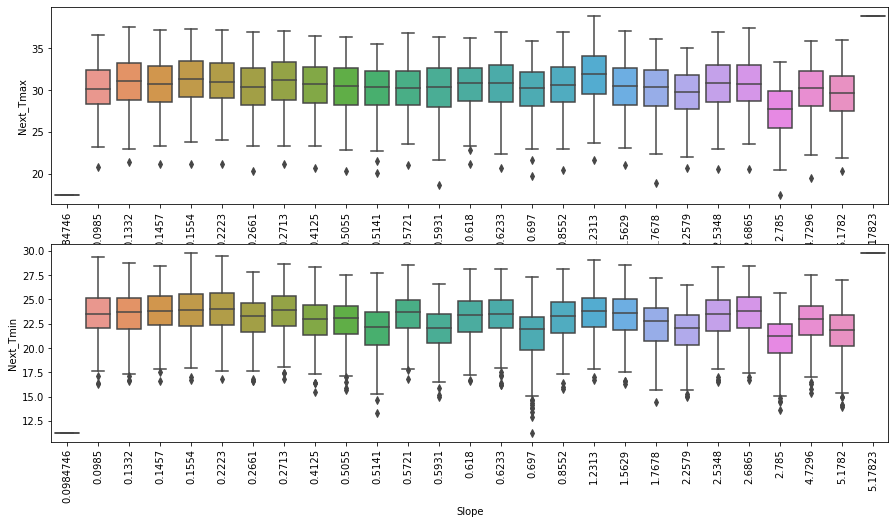

In [32]:
plt.figure(figsize = (15,8))
plt.subplot(2,1,1)
sns.boxplot(x='Slope',y='Next_Tmax',data =df)
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.boxplot(x='Slope',y='Next_Tmin',data=df)
plt.xticks(rotation=90)

A steep slope experience a more rapid change in temp. than a gentle one thats why as slops increses the range
 of temp.also increses.Lowest and Highest temp. are observed at consecutive slopes 0.697 and 0.8552 respectively

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmin'>

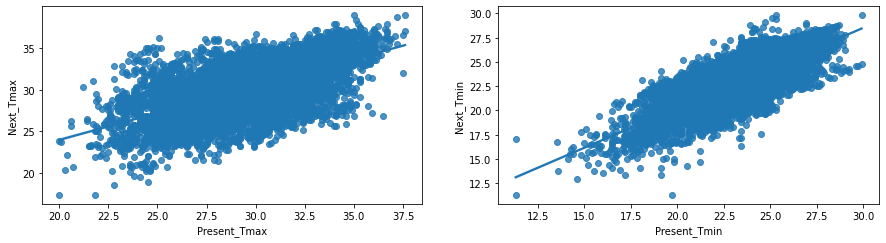

In [33]:
plt.figure(figsize = (15,8))
plt.subplot(2,2,3)
sns.regplot(x='Present_Tmax',y='Next_Tmax',data =df)
plt.subplot(2,2,4)
sns.regplot(x='Present_Tmin',y='Next_Tmin',data=df)

There is high positive correlation of next day temp.with the present day tempratures.

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Next_Tmin'>

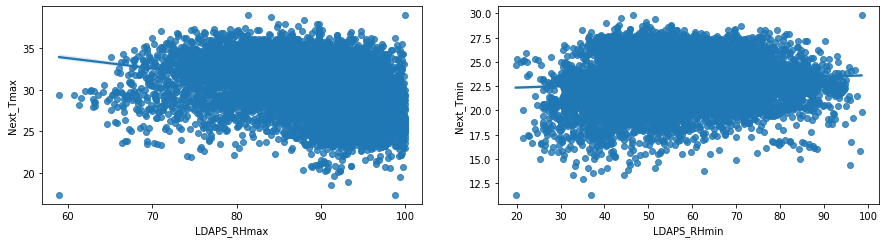

In [34]:
plt.figure(figsize = (15,8))
plt.subplot(2,2,3)
sns.regplot(x='LDAPS_RHmax',y='Next_Tmax',data =df)
plt.subplot(2,2,4)
sns.regplot(x='LDAPS_RHmin',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmin'>

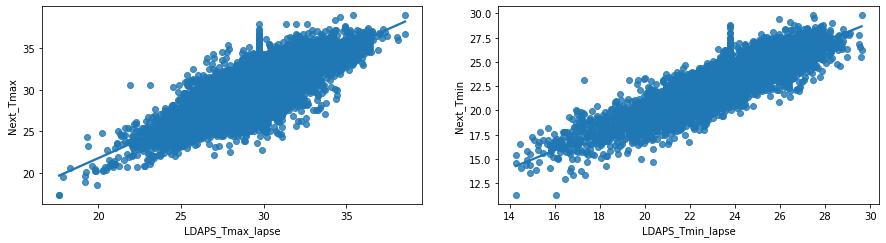

In [35]:
plt.figure(figsize = (15,8))
plt.subplot(2,2,3)
sns.regplot(x='LDAPS_Tmax_lapse',y='Next_Tmax',data =df)
plt.subplot(2,2,4)
sns.regplot(x='LDAPS_Tmin_lapse',y='Next_Tmin',data=df)

There is high positive correlation of next dayt tempratures applied lapse rate.If one increases other also increses.

### Leet's features Enginearing:

In [36]:
# droping some useless columns:
df.drop(columns=['lat','lon',],inplace =True)

In [37]:
#converting date in to Datetime:
df['Date'] = pd.to_datetime(df['Date'])

In [38]:
#lets check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7752 non-null   float64       
 1   Date              7752 non-null   datetime64[ns]
 2   Present_Tmax      7752 non-null   float64       
 3   Present_Tmin      7752 non-null   float64       
 4   LDAPS_RHmin       7752 non-null   float64       
 5   LDAPS_RHmax       7752 non-null   float64       
 6   LDAPS_Tmax_lapse  7752 non-null   float64       
 7   LDAPS_Tmin_lapse  7752 non-null   float64       
 8   LDAPS_WS          7752 non-null   float64       
 9   LDAPS_LH          7752 non-null   float64       
 10  LDAPS_CC1         7752 non-null   float64       
 11  LDAPS_CC2         7752 non-null   float64       
 12  LDAPS_CC3         7752 non-null   float64       
 13  LDAPS_CC4         7752 non-null   float64       
 14  LDAPS_PPT1        7752 n

In [39]:
#lets check skewness:
df.skew()

station             0.000182
Present_Tmax       -0.265337
Present_Tmin       -0.369481
LDAPS_RHmin         0.303565
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.228767
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340943
Next_Tmin          -0.405143
dtype: float64

In [40]:
# handling outlies & skewness:
from scipy import stats

from scipy.stats import zscore
z_score = zscore(df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC4','DEM','Slope','Solar radiation','Next_Tmax','Next_Tmin']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis=1)
df = df[filtering_entry]
df.reset_index(inplace = True)

In [41]:
# checking
df.skew()

index               0.001825
station             0.005016
Present_Tmax       -0.225318
Present_Tmin       -0.210971
LDAPS_RHmin         0.284029
LDAPS_RHmax        -0.757726
LDAPS_Tmax_lapse   -0.094584
LDAPS_Tmin_lapse   -0.366067
LDAPS_WS            1.028108
LDAPS_LH            0.602758
LDAPS_CC1           0.487718
LDAPS_CC2           0.473511
LDAPS_CC3           0.643133
LDAPS_CC4           0.679945
LDAPS_PPT1          5.271762
LDAPS_PPT2          5.724629
LDAPS_PPT3          6.715920
LDAPS_PPT4          6.825638
DEM                 1.778212
Slope               1.602414
Solar radiation    -0.502651
Next_Tmax          -0.263537
Next_Tmin          -0.215699
dtype: float64

In [42]:
# handling date column convert in to float values:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

df['Date'] = enc.fit_transform(df['Date'].values.reshape(-1,1))

In [43]:
#checking 
df.head()

,index,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0,1.0,12.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,...,0.130928,0.0,0.0,0.0,0.0,212.3350,2.7850,5992.895996,29.1,21.2
1,1,2.0,12.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,...,0.127727,0.0,0.0,0.0,0.0,44.7624,0.5141,5869.312500,30.5,22.5
2,2,3.0,12.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,...,0.142125,0.0,0.0,0.0,0.0,33.3068,0.2661,5863.555664,31.1,23.9
3,3,4.0,12.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,...,0.134249,0.0,0.0,0.0,0.0,45.7160,2.5348,5856.964844,31.7,24.3
4,4,5.0,12.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,...,0.170021,0.0,0.0,0.0,0.0,35.0380,0.5055,5859.552246,31.2,22.5


In [44]:
#checinng the all converted float values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7468 entries, 0 to 7467
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             7468 non-null   int64  
 1   station           7468 non-null   float64
 2   Date              7468 non-null   float64
 3   Present_Tmax      7468 non-null   float64
 4   Present_Tmin      7468 non-null   float64
 5   LDAPS_RHmin       7468 non-null   float64
 6   LDAPS_RHmax       7468 non-null   float64
 7   LDAPS_Tmax_lapse  7468 non-null   float64
 8   LDAPS_Tmin_lapse  7468 non-null   float64
 9   LDAPS_WS          7468 non-null   float64
 10  LDAPS_LH          7468 non-null   float64
 11  LDAPS_CC1         7468 non-null   float64
 12  LDAPS_CC2         7468 non-null   float64
 13  LDAPS_CC3         7468 non-null   float64
 14  LDAPS_CC4         7468 non-null   float64
 15  LDAPS_PPT1        7468 non-null   float64
 16  LDAPS_PPT2        7468 non-null   float64


<AxesSubplot:>

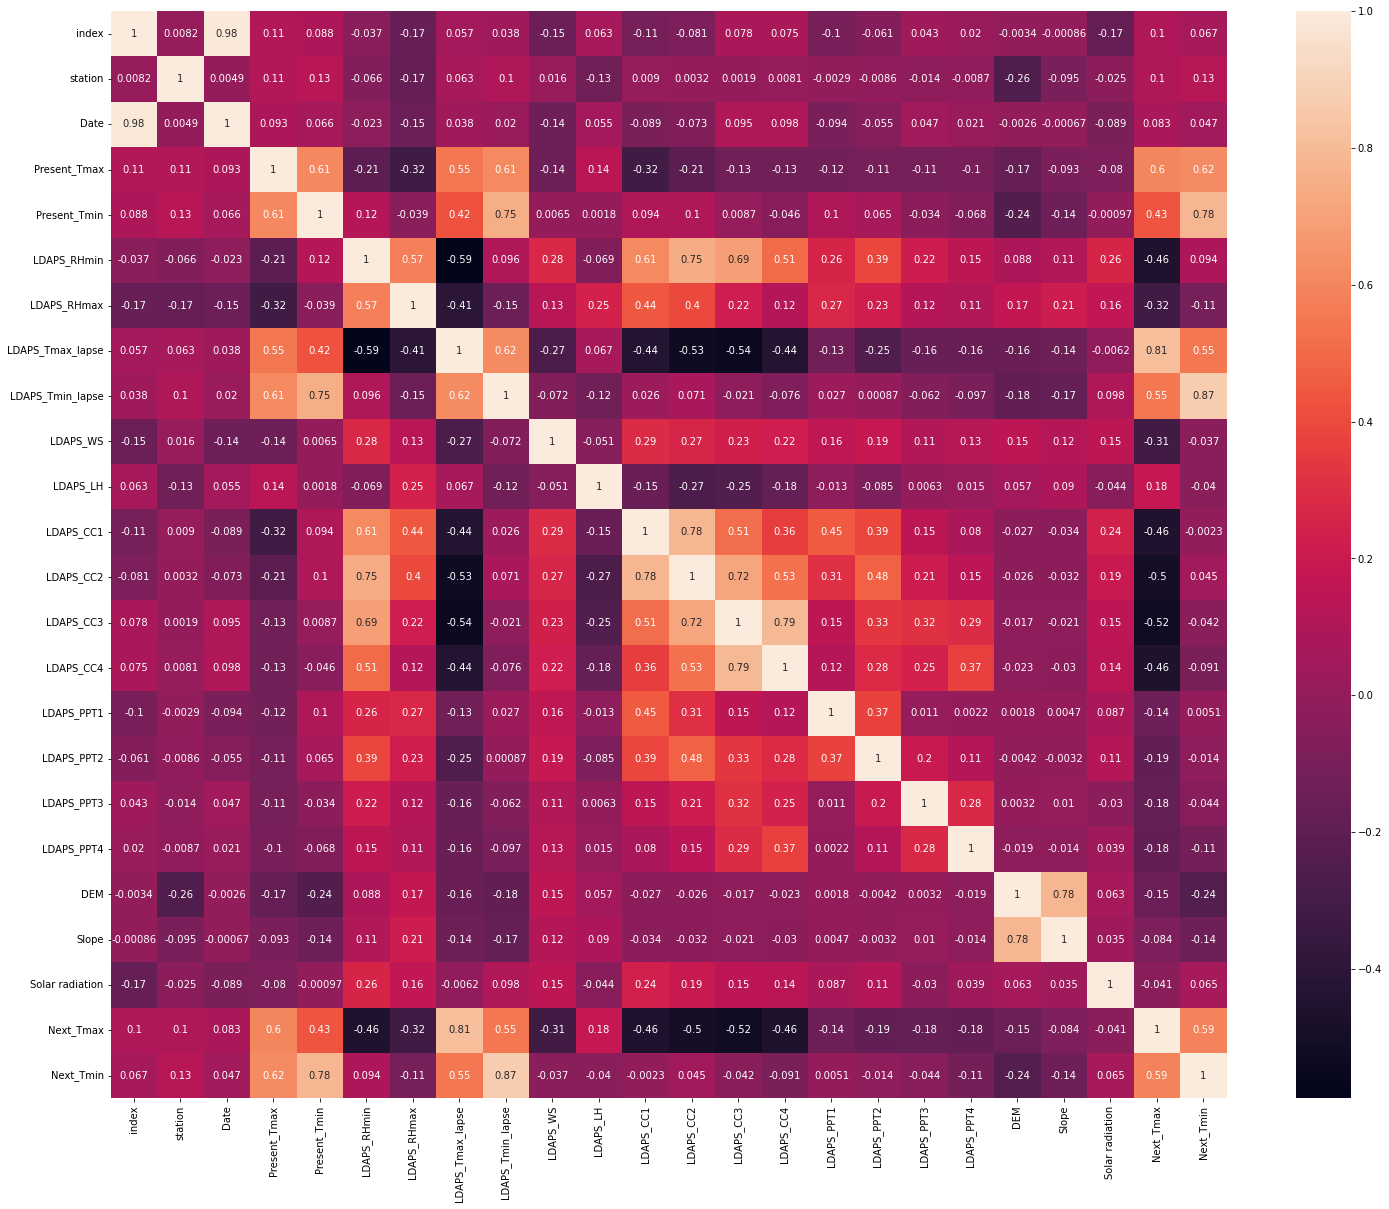

In [45]:
# chec the correlation with heatmap:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True)

# Seprate the labels and Variables:

In [46]:
x = df.drop(['Next_Tmax','Next_Tmin'],axis =1)
y = df[['Next_Tmax','Next_Tmin']]

In [47]:
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index] = np.cbrt(x[index])
        if x.skew().loc[index]<-0.5:
            x[index] = np.square(x[index])

In [48]:
x.skew()

index               0.001825
station             0.005016
Date                0.006972
Present_Tmax       -0.225318
Present_Tmin       -0.210971
LDAPS_RHmin         0.284029
LDAPS_RHmax        -0.757726
LDAPS_Tmax_lapse   -0.094584
LDAPS_Tmin_lapse   -0.366067
LDAPS_WS            0.575877
LDAPS_LH           -0.310616
LDAPS_CC1           0.487718
LDAPS_CC2           0.473511
LDAPS_CC3           0.190115
LDAPS_CC4          -0.456508
LDAPS_PPT1          1.988606
LDAPS_PPT2          2.316744
LDAPS_PPT3          2.638844
LDAPS_PPT4          2.959748
DEM                 0.943909
Slope               0.627384
Solar radiation    -0.502651
dtype: float64

In [49]:
# using this methd for biasness
Scaler =StandardScaler()
x = pd.DataFrame(Scaler.fit_transform(x),columns = x.columns)
x

,index,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,...,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation
0,-1.724459,-1.668959,-1.583243,-0.389910,-0.837817,0.105158,0.376715,-0.592448,-0.287006,0.018126,...,-0.589611,-0.519588,-0.359486,-0.550928,-0.502148,-0.478882,-0.418902,2.376507,1.299785,1.534952
1,-1.724011,-1.530097,-1.583243,0.720119,-0.750868,-0.311945,0.302268,0.039573,0.182611,-0.659021,...,-0.401951,-0.530681,-0.377410,-0.550928,-0.502148,-0.478882,-0.418902,-0.133674,-0.411689,1.241157
2,-1.723563,-1.391236,-1.583243,0.616054,-0.011800,-0.560645,-0.662606,0.125168,0.424997,-0.381000,...,-0.379617,-0.319494,-0.298992,-0.550928,-0.502148,-0.478882,-0.418902,-0.479948,-0.857715,1.227471
3,-1.723115,-1.252374,-1.583243,0.754807,0.031674,0.104051,1.157697,-0.012388,-0.141179,-0.685818,...,-0.502959,-0.522239,-0.341198,-0.550928,-0.502148,-0.478882,-0.418902,-0.107653,1.177010,1.211803
4,-1.722667,-1.113513,-1.583243,0.546677,-0.620444,-0.039735,0.236849,-0.222527,-0.067953,-0.631544,...,-0.408913,-0.436541,-0.160981,-0.550928,-0.502148,-0.478882,-0.418902,-0.422988,-0.424379,1.217954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,1.746060,1.108270,1.649561,-2.332461,-2.402901,-2.231309,-1.493769,-0.685443,-2.435727,-0.105322,...,-1.270571,-1.711140,-1.838057,-0.550928,-0.502148,-0.478882,-0.418902,-0.733198,-0.329599,-2.118651
7464,1.746508,1.247131,1.649561,-2.540592,-2.576799,-1.855025,-0.703867,-1.079540,-2.659088,-0.610556,...,-1.292720,-1.710859,-1.421827,-0.550928,-0.502148,-0.478882,-0.418902,-0.913145,-1.232020,-2.152458
7465,1.746956,1.385992,1.649561,-2.263085,-2.707223,-2.088454,-1.405232,-1.205057,-2.219817,-0.374507,...,-1.071191,-1.711140,-2.540960,-0.550928,-0.502148,-0.478882,-0.418902,-1.227666,-1.155952,-2.148868
7466,1.747404,1.524854,1.649561,-2.263085,-2.446375,-2.276439,-1.634388,-0.970934,-2.239075,-0.140401,...,-1.094994,-1.711140,-2.540960,-0.550928,-0.502148,-0.478882,-0.418902,-1.136107,-0.963440,-2.160613


### Testing and Spliting:

In [50]:
# import necessoy librories:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [51]:
#finding best random state
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred= lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"on Random_state",maxRS)

Maximum r2 score is  0.7948151647057604 on Random_state 118


In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state = maxRS)

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import ExtraTreesRegressor

In [57]:
DE= DecisionTreeRegressor()
DE.fit(x_train,y_train)
pred_DE=DE.predict(x_test)
pred_train=DE.predict(x_train)
print('R2_score:',r2_score(y_test,pred_DE))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_DE))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_DE))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test,pred_DE)))

R2_score: 0.7661569371266737
R2_score on training Data: 100.0
Mean Absolute Error:- 0.9489736724676467
Mean Squared Error:- 1.7404306113342267
Root Mean Squared Error:- 1.3192538085350471


In [58]:
RF= RandomForestRegressor()
RF.fit(x_train,y_train)
pred_RF=RF.predict(x_test)
pred_train=RF.predict(x_train)
print('R2_score:',r2_score(y_test,pred_RF))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_RF))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_RF))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test,pred_RF)))

R2_score: 0.8988560242211252
R2_score on training Data: 98.43979851331525
Mean Absolute Error:- 0.6438215082552425
Mean Squared Error:- 0.752103758589914
Root Mean Squared Error:- 0.867239158819477


In [59]:
KN=  KNN()
KN.fit(x_train,y_train)
pred_KN=KN.predict(x_test)
pred_train=KN.predict(x_train)
print('R2_score:',r2_score(y_test,pred_KN))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_KN))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_KN))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test,pred_KN)))

R2_score: 0.880623887845882
R2_score on training Data: 91.5585488806613
Mean Absolute Error:- 0.6940919232485485
Mean Squared Error:- 0.8730058009817063
Root Mean Squared Error:- 0.9343477944436464


In [60]:
ET=  ExtraTreesRegressor()
ET.fit(x_train,y_train)
pred_ET=ET.predict(x_test)
pred_train=ET.predict(x_train)
print('R2_score:',r2_score(y_test,pred_ET))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_ET))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_ET))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test,pred_ET)))

R2_score: 0.9163826035901259
R2_score on training Data: 100.0
Mean Absolute Error:- 0.5817686300758589
Mean Squared Error:- 0.6183769221329758
Root Mean Squared Error:- 0.7863694565107268


### Cross-val-Score:

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
score = cross_val_score(RF,x,y)
print(score)
print(score.mean())
print("Diffrence between R2 score and cross validation score is-",(r2_score(y_test,pred_RF)-score.mean())*100)

[0.62071137 0.62407112 0.69877569 0.80707013 0.65977838]
0.6820813376195545
Diffrence between R2 score and cross validation score is- 21.867856171699174


In [45]:
score = cross_val_score(DE,x,y)
print(score)
print(score.mean())
print("Diffrence between R2 score and cross validation score is-",(r2_score(y_test,pred_DE)-score.mean())*100)

[0.18851338 0.35115774 0.43721582 0.62669631 0.3835336 ]
0.39742337095615177
Diffrence between R2 score and cross validation score is- 36.99351981404505


In [46]:
score = cross_val_score(KN,x,y)
print(score)
print(score.mean())
print("Diffrence between R2 score and cross validation score is-",(r2_score(y_test,pred_KN)-score.mean())*100)

[0.36331691 0.38670968 0.54166901 0.64708177 0.50476304]
0.48870808237635527
Diffrence between R2 score and cross validation score is- 39.19158054695267


In [49]:
score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Diffrence between R2 score and cross validation score is-",(r2_score(y_test,pred_ET)-score.mean())*100)

[0.63306519 0.64461266 0.71792471 0.79212792 0.66572004]
0.690690103420192
Diffrence between R2 score and cross validation score is- 22.597355483588387


### HyperParameters:

In [42]:
#  RandomForestRegressor:
from sklearn.model_selection import RandomizedSearchCV

param = {'max_depth':[int(x)for x in np.linspace(5,10,num=2)],
              'max_features':['auto','log2'],
              'n_estimators':[int(X)for X in np.linspace(start=5,stop=15,num=10)],
              'bootstrap':[True,False]}

In [44]:
RF=  RandomizedSearchCV(RandomForestRegressor(),parameters,cv= 5)

In [45]:
RF.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [5, 6, 7, 8, 9, 10, 11,
                                                         12, 13, 15]})

In [46]:
RF.best_params_

{'n_estimators': 15,
 'max_features': 'log2',
 'max_depth': 10,
 'bootstrap': True}

In [47]:
RF.best_score_

0.8593707489099147

In [50]:
Model = RandomForestRegressor(n_estimators = 15, max_features= 'log2',max_depth= 10,bootstrap='True')
Model.fit(x_train,y_train)
pred = Model.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred))
print('Mean Squared Error:-',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.872154625282607
Mean Absolute Error:- 0.7412528310004275
Mean Squared Error:- 0.9449128120738606
Root Mean Squared Error:- 0.9720662590964984


### Saving the Model:

In [51]:
# we use joblib methode for save the model
import joblib
joblib.dump(Model,"Forcasting Temp.Prediction")

['Forcasting Temp.Prediction']

In [52]:
# load the saved model
model = joblib.load("Forcasting Temp.Prediction")

#pediction
prediction = model.predict(x_test)
prediction

array([[32.33394617, 24.0025484 ],
       [32.0051211 , 25.09095108],
       [31.61598588, 21.14650804],
       ...,
       [32.53561368, 25.27496973],
       [29.61518516, 24.86397963],
       [30.70743802, 24.01997055]])

### Loan Application Status Prediction:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In this data set 614 rows and 13 columns:

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
#checking null values:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Handling the missing values in our data set:
df = df.dropna()

In [10]:
# le's check it again:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
# checking the duplicated values:
df.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 480, dtype: bool

No duplicate values are presents:

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


# Catagorical visualizations:

<AxesSubplot:xlabel='Gender', ylabel='count'>

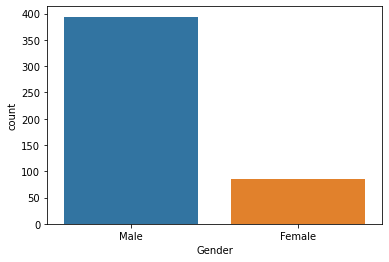

In [15]:
sns.countplot(df['Gender'])

we can see here from loan Approval prediction there are more Men than Women.

<AxesSubplot:xlabel='Married', ylabel='count'>

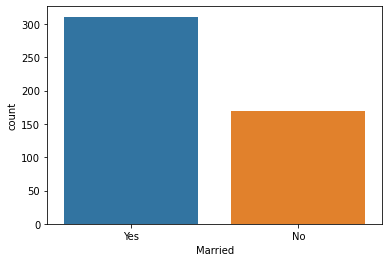

In [16]:
sns.countplot(df['Married'])

in Marital status the population of married is higher than the non -married population.here we can see married applicants are more
likely to be granted loans.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

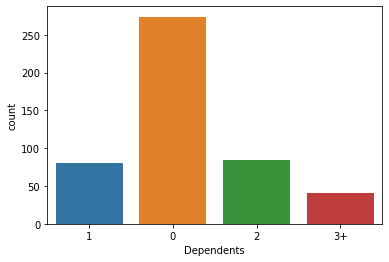

In [17]:
sns.countplot(df['Dependents'])

in Dependents column Majority of the population have zero Dependents and are also likely to accepted for loan.

<AxesSubplot:xlabel='Education', ylabel='count'>

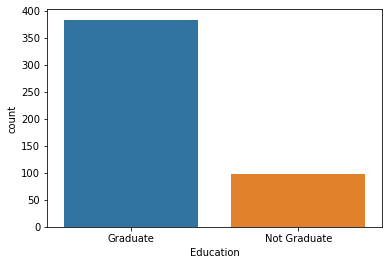

In [18]:
sns.countplot(df['Education'])

in this data set we can see that Graduates have higher population of loan approval.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

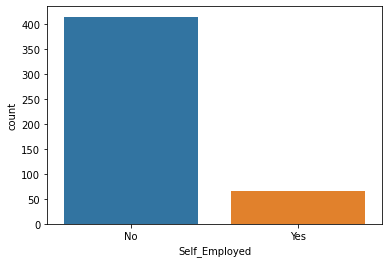

In [19]:
sns.countplot(df['Self_Employed'])

### here we can see most of the population is not self employed.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

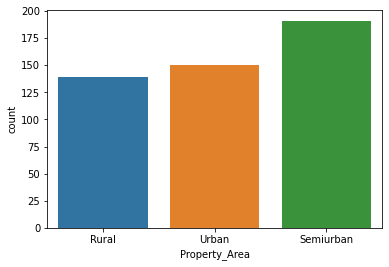

In [20]:
sns.countplot(df['Property_Area'])

More applicants from Semiurban and also likely to be granted loans.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

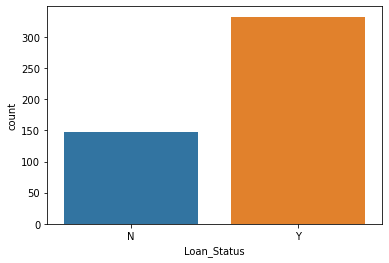

In [21]:
sns.countplot(df['Loan_Status'])

In Loan status  more applicants have granted loan.

### Numerical Visualization:

6.917026514199138
74.0631519219775


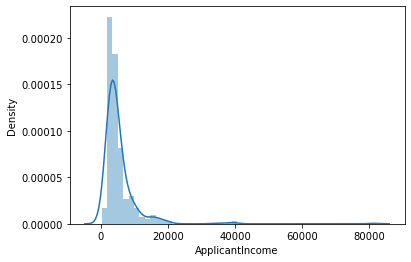

In [22]:
sns.distplot(df['ApplicantIncome'])
print(df['ApplicantIncome'].skew())

print(df['ApplicantIncome'].kurt())

0.5628913235806148
3.1889298536722626


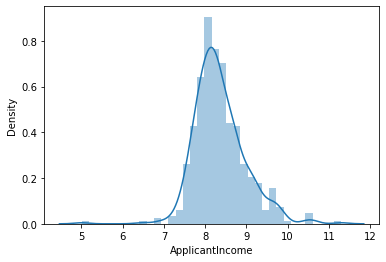

In [23]:
# apply Log transformation to the attributes for Normalization:
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncome'])
print(df['ApplicantIncome'].skew())

print(df['ApplicantIncome'].kurt())

5.881622127841592
57.658049059160525


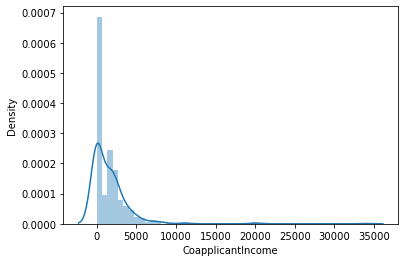

In [24]:
sns.distplot(df['CoapplicantIncome'])
print(df['CoapplicantIncome'].skew())

print(df['CoapplicantIncome'].kurt())

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

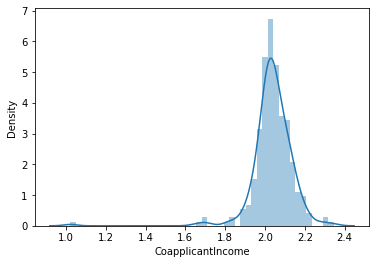

In [26]:
# apply Log transformation to the attributes for Normalization:
df['CoapplicantIncome'] = np.log(df['CoapplicantIncome'])
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

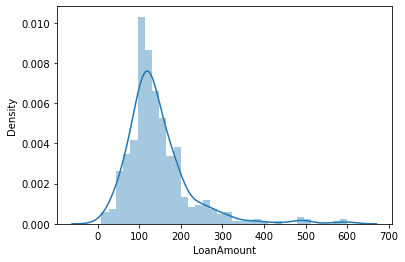

In [27]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

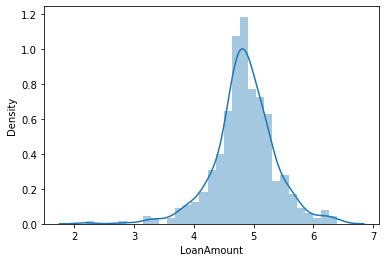

In [28]:
df['LoanAmount'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

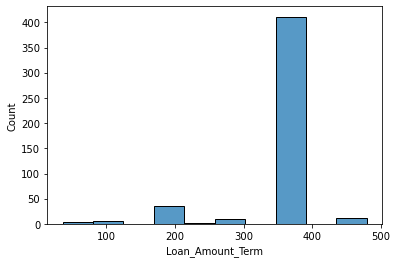

In [29]:
sns.histplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

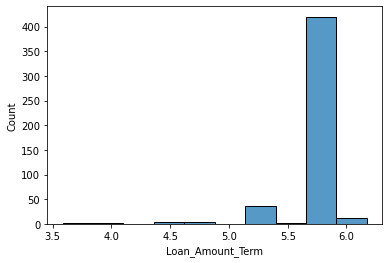

In [30]:
df['Loan_Amount_Term'] = np.log(df['Loan_Amount_Term'])
sns.histplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Count'>

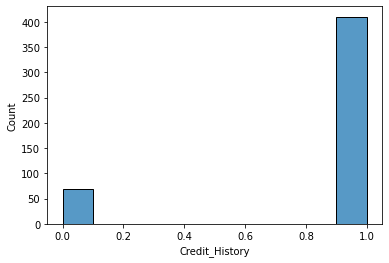

In [31]:
sns.histplot(df['Credit_History'])

In [32]:
# droping unnecessory column:
df = df.drop(['Loan_ID'],axis=1)

In [33]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,8.430109,1.990411,4.852030,5.886104,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,NaN,4.189655,5.886104,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.856707,2.049700,4.787492,5.886104,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699515,NaN,4.948760,5.886104,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,8.597297,2.121289,5.587249,5.886104,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,7.972466,NaN,4.262680,5.886104,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,8.320205,NaN,3.688879,5.192957,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8.996157,1.701222,5.533389,5.886104,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,8.933664,NaN,5.231109,5.886104,1.0,Urban,Y


### Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [35]:
df = df.ffill(0)

In [36]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,8.430109,1.990411,4.852030,5.886104,1.0,0,0
2,1,1,0,0,1,8.006368,1.990411,4.189655,5.886104,1.0,2,1
3,1,1,0,1,0,7.856707,2.049700,4.787492,5.886104,1.0,2,1
4,1,0,0,0,0,8.699515,2.049700,4.948760,5.886104,1.0,2,1
5,1,1,2,0,1,8.597297,2.121289,5.587249,5.886104,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,2.024931,4.262680,5.886104,1.0,0,1
610,1,1,3,0,0,8.320205,2.024931,3.688879,5.192957,1.0,0,1
611,1,1,1,0,0,8.996157,1.701222,5.533389,5.886104,1.0,2,1
612,1,1,2,0,0,8.933664,1.701222,5.231109,5.886104,1.0,2,1


<AxesSubplot:>

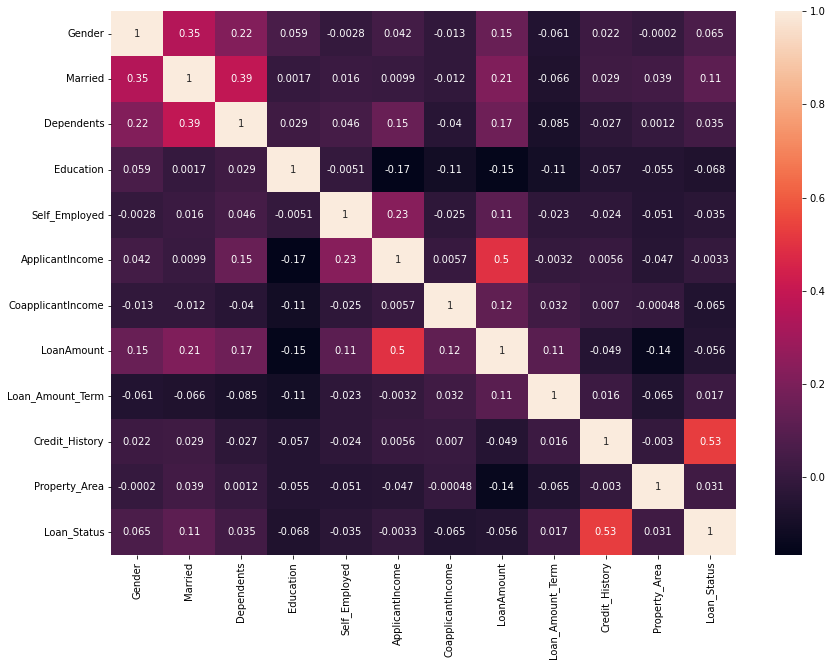

In [37]:
# chec the correlation with heatmap:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int32  
 1   Married            480 non-null    int32  
 2   Dependents         480 non-null    int32  
 3   Education          480 non-null    int32  
 4   Self_Employed      480 non-null    int32  
 5   ApplicantIncome    480 non-null    float64
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    int32  
 11  Loan_Status        480 non-null    int32  
dtypes: float64(5), int32(7)
memory usage: 35.6 KB


### Seprating features and labels:

In [39]:
x = df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']

### Using StandardScaler Method:

In [40]:
# using this methd for biasness
Scaler =StandardScaler()
x = pd.DataFrame(Scaler.fit_transform(x),columns = x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.467198,0.737162,0.218599,-0.503253,-0.399275,0.122576,-0.352532,0.007246,0.278300,0.413197,-1.318868
1,0.467198,0.737162,-0.762033,-0.503253,2.504541,-0.559526,-0.352532,-1.292046,0.278300,0.413197,1.259774
2,0.467198,0.737162,-0.762033,1.987072,-0.399275,-0.800437,0.114374,-0.119351,0.278300,0.413197,1.259774
3,0.467198,-1.356553,-0.762033,-0.503253,-0.399275,0.556241,0.114374,0.196987,0.278300,0.413197,1.259774
4,0.467198,0.737162,1.199231,-0.503253,2.504541,0.391701,0.678150,1.449424,0.278300,0.413197,1.259774
...,...,...,...,...,...,...,...,...,...,...,...
475,-2.140419,-1.356553,-0.762033,-0.503253,-0.399275,-0.614098,-0.080686,-1.148803,0.278300,0.413197,-1.318868
476,0.467198,0.737162,2.179863,-0.503253,-0.399275,-0.054339,-0.080686,-2.274349,-2.047973,0.413197,-1.318868
477,0.467198,0.737162,0.218599,-0.503253,-0.399275,1.033749,-2.629924,1.343776,0.278300,0.413197,1.259774
478,0.467198,0.737162,1.199231,-0.503253,-0.399275,0.933154,-2.629924,0.750832,0.278300,0.413197,1.259774


In [41]:
#lets check the y counts
y.value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [42]:
#oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [43]:
y.value_counts()

0    332
1    332
Name: Loan_Status, dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int32  
 1   Married            480 non-null    int32  
 2   Dependents         480 non-null    int32  
 3   Education          480 non-null    int32  
 4   Self_Employed      480 non-null    int32  
 5   ApplicantIncome    480 non-null    float64
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    int32  
 11  Loan_Status        480 non-null    int32  
dtypes: float64(5), int32(7)
memory usage: 35.6 KB


### Testing & Spliting:

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state =42)

In [46]:
from sklearn.metrics  import confusion_matrix,classification_report,accuracy_score

In [47]:
def metric_score(clf, x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        
        print("\n==========Train Result=========")
        
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100: .2f}%")
        
    
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n=========Train Result========")
        
        print(f"Accuracy Score: {accuracy_score(y_test, pred)*100: .2f}%")
        
        print('\n \n Test Cassification Report \n',classification_report(y_test,pred,digits=2))

### Model-Training:

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
metric_score(RFC,x_train,x_test,y_train,y_test,train=True)
metric_score(RFC,x_train,x_test,y_train,y_test,train=False)


==========Train Result=========
Accuracy Score:  100.00%

=========Train Result========
Accuracy Score:  83.13%

 
 Test Cassification Report 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83        84
           1       0.82      0.84      0.83        82

    accuracy                           0.83       166
   macro avg       0.83      0.83      0.83       166
weighted avg       0.83      0.83      0.83       166



In [52]:
#for DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [53]:
Dec = DecisionTreeClassifier()
Dec.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
metric_score(Dec,x_train,x_test,y_train,y_test,train=True)

metric_score(Dec,x_train,x_test,y_train,y_test,train=False)


==========Train Result=========
Accuracy Score:  100.00%

=========Train Result========
Accuracy Score:  74.10%

 
 Test Cassification Report 
               precision    recall  f1-score   support

           0       0.73      0.77      0.75        84
           1       0.75      0.71      0.73        82

    accuracy                           0.74       166
   macro avg       0.74      0.74      0.74       166
weighted avg       0.74      0.74      0.74       166



In [55]:
# for AdaBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [56]:
Adb = AdaBoostClassifier()
Adb.fit(x_train,y_train)

AdaBoostClassifier()

In [57]:
metric_score(Adb,x_train,x_test,y_train,y_test,train=True)
metric_score(Adb,x_train,x_test,y_train,y_test,train=False)


==========Train Result=========
Accuracy Score:  82.93%

=========Train Result========
Accuracy Score:  77.11%

 
 Test Cassification Report 
               precision    recall  f1-score   support

           0       0.79      0.74      0.77        84
           1       0.75      0.80      0.78        82

    accuracy                           0.77       166
   macro avg       0.77      0.77      0.77       166
weighted avg       0.77      0.77      0.77       166



In [58]:
# for GradientbosstingClaasifier
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
Grb =GradientBoostingClassifier ()
Grb.fit(x_train,y_train)

GradientBoostingClassifier()

In [60]:
metric_score(Grb,x_train,x_test,y_train,y_test,train=True)
metric_score(Grb,x_train,x_test,y_train,y_test,train=False)


==========Train Result=========
Accuracy Score:  95.78%

=========Train Result========
Accuracy Score:  77.71%

 
 Test Cassification Report 
               precision    recall  f1-score   support

           0       0.83      0.70      0.76        84
           1       0.74      0.85      0.79        82

    accuracy                           0.78       166
   macro avg       0.78      0.78      0.78       166
weighted avg       0.78      0.78      0.78       166



### Cross-Val-Score:

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
#checkig cv score for RanndomForestClassifier
score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())

[0.7593985  0.79699248 0.85714286 0.81203008 0.88636364]
0.8223855092276147


In [63]:
#checkig cv score for DecisionTreeClassifier
score = cross_val_score(Dec,x,y)
print(score)
print(score.mean())

[0.71428571 0.7443609  0.80451128 0.72932331 0.81060606]
0.7606174527227159


In [64]:
# checking cv score for AdaBoostClassifier
score = cross_val_score(Adb,x,y)
print(score)
print(score.mean())

[0.62406015 0.73684211 0.79699248 0.71428571 0.74242424]
0.7229209387104124


In [65]:
# checking cv score for GradientBoostingClassifier
score = cross_val_score(Grb,x,y)
print(score)
print(score.mean())

[0.65413534 0.72180451 0.84210526 0.7443609  0.84848485]
0.7621781727044885


### Hyper-Parameters:

In [67]:
#  RandomForestClassifier:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'max_depth':[2,8,],
              'max_features':[0.2,0.6,1.0],
              'n_estimators':[20,60,100,120],
              'max_samples':[0.5,0.75,1.0],
              'criterion':['gini','entropy'],
              'bootstrap':[True,False]}

In [68]:
RFC=  RandomizedSearchCV(RandomForestClassifier(),parameters,cv= 5)

In [69]:
RFC.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 8],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'n_estimators': [20, 60, 100, 120]})

In [70]:
RFC.best_params_

{'n_estimators': 120,
 'max_samples': 1.0,
 'max_features': 0.6,
 'max_depth': 8,
 'criterion': 'entropy',
 'bootstrap': True}

In [71]:
Final_model = RandomForestClassifier(n_estimators = 120, max_features= 1.0,max_depth= 8,criterion= 'entropy',bootstrap = 'True',max_samples=1.0)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

83.13253012048193


### Saving The Model:

In [76]:
# we use joblib methode for save the model
import joblib
joblib.dump(Final_model,"Loan status Prediction")

['Loan status Prediction']

In [77]:
# load the saved model
model = joblib.load("Loan status Prediction")

#pediction
prediction = model.predict(x_test)
prediction

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0])